In [203]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

# 設定中文字體
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

In [204]:
URL = 'Iris.csv'
df = pd.read_csv(URL)
df = df.iloc[:,1:] #去掉id的資料
df_ = df.drop(columns=['Species']).copy() #去掉Species的資料
print(df_)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


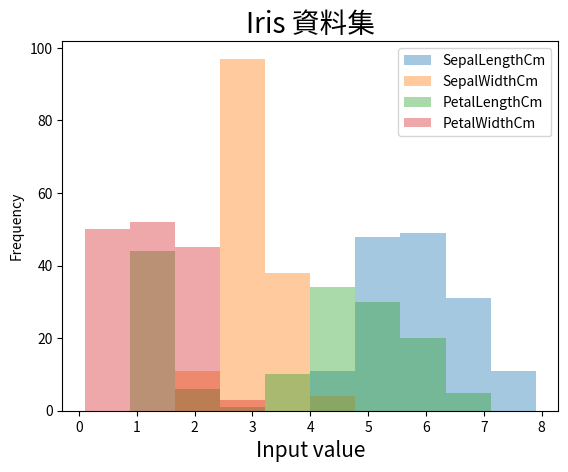

In [205]:
# 繪製 Histogram
df_.plot.hist(alpha = 0.4)
plt.legend()
plt.title('Iris 資料集', fontsize = 20)
plt.xlabel('Input value', fontsize = 15)
plt.show()

In [206]:
def Gaus_neuron(df, n, step, s): # (Data, 神經元數量, 步長, 高斯分佈的標準差)

    neurons_list = list()
    x_axis_list = list()
    t = 0

    for col in df.columns:

        vol = df[col].values
        min_ = np.min(vol)
        max_ = np.max(vol)
        x_axis = np.arange(min_, max_, step)#根據最小值、最大值和步長生成x軸
        x_axis[0] = min_
        x_axis[-1] = max_
        x_axis_list.append(np.round(x_axis, 10)) #四捨五入到小數點後10位
        neurons = np.zeros((n, len(x_axis))) #用來存儲 n 個神經元在 x_axis 上的響應

        for i in range(n): #計算每個神經元的響應
            loc = (max_ - min_) * (i /(n-1)) + min_
            neurons[i] = norm.pdf(x_axis, loc, s[t])
            neurons[i] = neurons[i] / np.max(neurons[i])

        neurons_list.append(neurons) # 存儲結果並更新索引
        t += 1

    return neurons_list, x_axis_list


In [207]:
sigm = [0.1, 0.1, 0.2, 0.1] #高斯分佈的參數
d = Gaus_neuron(df_, 10, 0.001, sigm) #產生高斯分佈

d

([array([[1.000000, 0.999950, 0.999800, ..., 0.000000, 0.000000, 0.000000],
         [0.000335, 0.000349, 0.000363, ..., 0.000000, 0.000000, 0.000000],
         [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
         ...,
         [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
         [0.000000, 0.000000, 0.000000, ..., 0.000363, 0.000349, 0.000335],
         [0.000000, 0.000000, 0.000000, ..., 0.999800, 0.999950, 1.000000]]),
  array([[1.000000, 0.999950, 0.999800, ..., 0.000000, 0.000000, 0.000000],
         [0.028566, 0.029336, 0.030124, ..., 0.000000, 0.000000, 0.000000],
         [0.000001, 0.000001, 0.000001, ..., 0.000000, 0.000000, 0.000000],
         ...,
         [0.000000, 0.000000, 0.000000, ..., 0.000001, 0.000001, 0.000001],
         [0.000000, 0.000000, 0.000000, ..., 0.030124, 0.029336, 0.028566],
         [0.000000, 0.000000, 0.000000, ..., 0.999800, 0.999950, 1.000000]]),
  array([[1.000000, 0.999988, 0.999950, ..., 0.000000, 0

1. 使用 "SepalWidthCm"(花萼寬度) 特徵的前五個數據點進行分析
2. 對每個點，計算跟高斯分佈（前突觸神經元）的交點，並用這些交點來表示點的神經元響應。


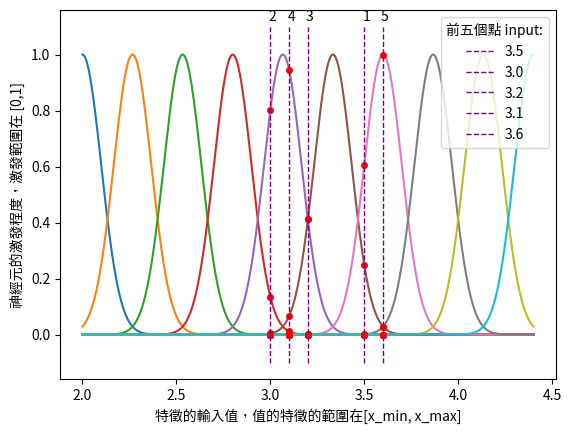

In [208]:
x_input = 5
fig, ax = plt.subplots(1)

ax.set(ylabel = df_.columns[1]) #Y軸標籤的第二列"SepalWidthCm"

# 對每個點，計算跟高斯分佈（前突觸神經元）的交點
for i in range(len(d[0][1])):
    ax.plot(d[1][1], d[0][1][i])

for n in range(x_input):

    plt.plot(np.tile(df_['SepalWidthCm'][n], (10,1)), 
            d[0][1][np.tile(d[1][1] == df_['SepalWidthCm'][n], (10,1))], 
            'ro', markersize=4)

    plt.vlines(x = df_['SepalWidthCm'][n], ymin = - 0.1, ymax = 1.1, 
            colors = 'purple', ls = '--', lw = 1, label = df_['SepalWidthCm'][n])

    plt.text(df_['SepalWidthCm'][n] * 0.997, 1.12, n + 1, size = 10)


plt.legend(title = "前五個點 input:")

ax.set_xlabel('特徵的輸入值，值的特徵的範圍在[x_min, x_max]')
ax.set_ylabel('神經元的激發程度，激發範圍在 [0,1]')

plt.show()

3. 使用Boole矩陣計算並輸出交點的值並儲存在(five_x)， 10個高斯神經元上的響應值設定完成

In [209]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
five_x = np.zeros((5, 10))

for n in range(x_input):
    five_x[n,:] = d[0][1][np.tile(d[1][1] == df_['SepalWidthCm'][n], (10,1))]
five_x


array([[0.000000, 0.000000, 0.000000, 0.000000, 0.000084, 0.249354,
        0.606531, 0.001204, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000019, 0.135335, 0.800742, 0.003866,
        0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000335, 0.411115, 0.411115,
        0.000335, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.011109, 0.945965, 0.065729,
        0.000004, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000001, 0.028566,
        1.000000, 0.028566, 0.000001, 0.000000]])

4. 設定threshold為0.1，激發度> 0.1的值轉換為1 - five_x，小於或等於0.1的值替換為 np.nan，表示未被激發

In [210]:
five_x = np.where(five_x > 0.1, 1 - five_x, np.nan)
five_x[five_x == 0] = 0.0001 #避免後續計算中的問題
five_x

array([[nan, nan, nan, nan, nan, 0.750646, 0.393469, nan, nan, nan],
       [nan, nan, nan, 0.864665, 0.199258, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, 0.588885, 0.588885, nan, nan, nan, nan],
       [nan, nan, nan, nan, 0.054035, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, 0.000100, nan, nan, nan]])

In [211]:
def Lat_Spike(df, d, n):

    for i in range(len(df.columns)):

        k = len(df.iloc[:, i])
        st1 = np.tile(d[1][i], (k, 1))
        st2 = df.iloc[:, i].values.reshape(-1, 1)
        ind = (st1 == st2)
        exc = np.tile(d[0][i], (k, 1)).reshape(k, n, len(d[0][i][0]))[
            np.repeat(ind, n, axis=0).reshape(k, n, len(ind[0]))].reshape(k, n)
        lat_neuron = np.transpose(np.where(exc > 0.1, 1 - exc, np.nan))

        if i == 0:
            lat_neuron_total = lat_neuron
        else:
            lat_neuron_total = np.concatenate((lat_neuron_total, lat_neuron), axis = 0)

    lat_neuron_total[lat_neuron_total == 0] = 0.0001

    return lat_neuron_total

fin = Lat_Spike(df_, d, 10)

In [212]:
Final_df = pd.DataFrame(fin)
Final_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393469,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.864665,0.000100,0.393469,NaN,NaN,0.393469,NaN,NaN,0.864665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000100,0.864665,NaN,NaN,0.393469,NaN,NaN,0.393469,NaN,0.864665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.393469,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.393469,NaN,NaN,NaN,NaN,NaN,NaN,0.000100
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000100,0.864665,0.393469,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000100,0.864665,NaN,0.393469,0.000100,0.000100,NaN,0.864665,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.864665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 訓練 LIF 神經元
1. 子樣本大小為 60：每種花類型的前 20 個值
2. 共有 150 個資料集，其中前 50 筆記錄屬於 Iris-setosa，50-100 筆屬於 Iris-versicolor，100-150 筆記錄屬於 Iris-virginica

In [213]:
def model_data(ind, ind_type, lat_ne, start, end):
    
    train_stack = np.vstack((lat_ne[ind_type[ind, 0] + start:ind_type[ind, 0] + end],
                            lat_ne[ind_type[ind, 1] + start:ind_type[ind, 1] + end],
                            lat_ne[ind_type[ind, 2] + start:ind_type[ind, 2] + end]))
    train_stack = np.where(train_stack > 0, train_stack, 0)
    
    return train_stack

# 使用 STDP 進行校正
獲得第一組權重
1. 所有權重最初等於 0.1
2. 公式：delta_weight = +Const * (1 — latency)
3. 

In [214]:
lat_ne = np.transpose(Final_df.values)
ind_type = np.array(([0, 50, 100], [50, 100, 0], [100, 0, 50]))
list_weight = np.zeros((3,40))

for ind in range(3):
    
    train_stack = model_data(ind, ind_type, lat_ne, 0, 20)
    tr_ar = np.where(np.transpose(train_stack) > 0, 2 * (1 - np.transpose(train_stack)), 0)
    tr_ar[:, 20:] = tr_ar[:, 20:] * (-1)
    tr_ar = pd.DataFrame(tr_ar)
    tr_ar[20] = tr_ar.iloc[:,:20].sum(axis = 1) + 0.1
    tst_ar = np.float64(np.transpose(np.array(tr_ar.iloc[:,20:])))
    
    for i in range(1, len(tst_ar)):
        
        tst_ar[0][((np.round(tst_ar[0], 4) > 0.1) & (tst_ar[i] == 0))] += - np.float64(
            np.sum(tst_ar[i][np.round(tst_ar[0], 4) > 0.1]) / len(tst_ar[0][((
                np.round(tst_ar[0], 4) > 0.1) & (tst_ar[i] == 0))]))
        tst_ar[0][np.round(tst_ar[0], 4) > 0.1] += tst_ar[i][np.round(tst_ar[0], 4) > 0.1]
        tst_ar[0][tst_ar[0] < 0.1] = 0.1
        
    list_weight[ind, :] = tst_ar[0]

list_weight


array([[6.327651, 9.871060, 8.845120, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 2.928582, 7.467641, 9.633854,
        3.937019, 5.114590, 9.286149, 24.821730, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 0.100000,
        22.327485, 20.183585, 0.100000, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000],
       [0.100000, 0.100000, 0.100000, 7.079353, 3.988910, 4.650976,
        4.987558, 0.100000, 0.100000, 0.100000, 8.024717, 10.069888,
        0.100000, 3.975590, 0.100000, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 0.100000, 0.100000, 6.758999,
        12.650149, 17.925515, 0.100000, 0.100000, 0.100000, 0.100000,
        0.100000, 0.100000, 0.100000, 11.383210, 13.145523, 25.117006,
        0.100000, 0.100000, 0.100000, 0.100000],
       [0.100000, 0.100000, 0.100000, 0.100000, 1.051971, 5.704924,
        4

使用神經元膜電位的公式來模擬膜電位

In [215]:
def LIF_SNN(n, l, data, weight, v_spike):
    
    V_min = 0
    V_spike = v_spike
    r = 5
    tau = 2.5
    dt = 0.01
    t_max = 10
    time_stamps = t_max / dt
    time_relax = 10
    v = np.zeros((n, l, int(time_stamps)))
    t_post = np.zeros((n, l))
    t_post_ = np.zeros((n, int(l / 3)))
    v[:, :, 0] = V_min
    
    for n in range(n):
        for u in range(l):
            
            t = 0
            f0 = (np.round(data[u][np.newaxis].T, 3) * 1000).astype(int)
            f1 = np.tile(np.arange(1000), (40, 1))
            f2 = np.where(((f1 == f0) & (f0 > 0)), 1, 0)
            f2 = f2 * weight[n][np.newaxis].T
            spike_list = np.sum(f2.copy(), axis = 0)

            for step in range(int(time_stamps) - 1):
                if v[n, u, step] > V_spike:
                    t_post[n, u] = step
                    v[n, u, step] = 0
                    t = time_relax / dt
                elif t > 0:
                    v[n, u, step] = 0
                    t = t - 1

                v[n, u, step + 1] = v[n, u, step] + dt / tau * (-v[n, u, step] + r * spike_list[step])
        t_post_[n, :] = t_post[n, n * int(l / 3):n * int(l / 3) + int(l / 3)]
    
    return v, t_post_, t_post

可視化每個突觸後神經元膜電位的功能

In [216]:
def v_plot(v):
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (25, 10))#, dpi = 70)
    k = len(v[0,:,:])
    di = {0: 'blue', 1: 'red', 2: 'black'}
    di_t = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    p = 0
    
    for ax in [ax1, ax2, ax3]:
        for i in range(k):
            ax.plot(np.arange(i * 10, (i + 1) * 10, 0.01), v[p, i, :], di[p], linewidth = 1)
            ax.set_ylabel(f' Neuron {p + 1} \n {di_t[p]} \nV (mV)', fontsize = 15)

        ax.axvspan(0, int(k * 10 / 3), color = di[0], alpha = 0.05, label = di_t[0])
        ax.axvspan(int(k * 10 / 3), int(k * 10 * 2 / 3), color = di[1], alpha = 0.05, label = di_t[1])
        ax.axvspan(int(k * 10 * 2 / 3), int(k * 10 * 3 / 3), color = di[2], alpha = 0.05, label = di_t[2])
        ax.margins(0)

        p += 1
    
    plt.legend(title = "    Part of a type set:" ,bbox_to_anchor = (1, 2), loc = 'upper left', fontsize = 15, title_fontsize = 15)
    plt.xlabel('Time (ms)', fontsize = 15)
    plt.suptitle(' \n Activity of postsynaptic neurons on the used part of the dataset \n (Membrane potential)', fontsize = 20)

如果多個突觸後神經元在一個週期內產生尖峰，則首先產生尖峰的突觸後神經元被認為已放電

In [217]:
def accuracy_snn(spike_time, start, end, df, ind_type, ind):
    
    type_dict = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
    target_type_total = np.array(df.replace({'Species': type_dict}).iloc[:, - 1])
    target_type = np.vstack((target_type_total[ind_type[ind, 0] + start:ind_type[ind, 0] + end],
                            target_type_total[ind_type[ind, 1] + start:ind_type[ind, 1] + end],
                            target_type_total[ind_type[ind, 2] + start:ind_type[ind, 2] + end])).flatten()
    
    spike_time_ = np.where(spike_time > 0, np.array(([1], [2], [3])), np.nan)
    final_test = np.full([len(spike_time[0])], np.nan).astype(int)
    for i in range(len(spike_time[0])):
        try:
            final_test[i] = spike_time_[:, i][spike_time[:, i] == np.min(spike_time[:, i][spike_time[:, i] > 0])][0]
        except:
            final_test[i] = 0
    
    ac = np.sum(np.where(final_test == target_type, 1, 0)) / len(target_type)

    return final_test, target_type, print('準確率:', np.round(ac * 100, 2), '%')

調整並增加了每個突觸後神經元每種類型的前 20 個實例的權重，從而產生了三組權重。讓我們用在訓練集的同一第一部分上獲得的權重來檢查每個突觸後神經元的膜電位分佈。在這個階段，我們不會將膜電位限制在閾值水平，選擇它等於100：

可視化突觸後神經元尖峰時刻的函數

In [218]:
def spike_plot(spike_times, one_per, n, cur_type):
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (25, 10))#, dpi = 70)
    
    if one_per:
        k, t, a  = 1, n, 0
        cur = cur_type
    else:
        k, t, a = len(spike_times[0]), 0, 1
        cur = 1
        
    spike_times[spike_times == 0] = np.nan
    di = {0: 'blue', 1: 'red', 2: 'black'}
    di_t = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    p = 0
    
    for ax in [ax1, ax2, ax3]:
        for i in range(k * t, k + t):
            ax.vlines(x = spike_times[p, i] / 100 + i * a * 10, ymin = 0.0, ymax = 1.1, 
                       colors = di[p], ls = '-', lw = 3)
            ax.set_ylabel(f'Neuron {p + 1} \n {di_t[p]}', fontsize = 15)
            
        if one_per:
            ax.axvspan(0, int(k * 10), color = di[cur - 1], alpha = 0.05, label = di_t[cur - 1])
            ax.margins(0)
        else:
            ax.axvspan(0, int(k * 10 / 3), color = di[0], alpha = 0.05, label = di_t[0])
            ax.axvspan(int(k * 10 / 3), int(k * 10 * 2 / 3), color = di[1], alpha = 0.05, label = di_t[1])
            ax.axvspan(int(k * 10 * 2 / 3), int(k * 10 * 3 / 3), color = di[2], alpha = 0.05, label = di_t[2])
            ax.set_xlim(0, k * 10)
            ax.margins(0)
            
        p += 1
        
    
    if one_per:
        plt.suptitle(f' \n\n Moment of spike of postsynaptic neurons for train period {n}', fontsize = 20)
        plt.legend(title = "    Part of a type set:" ,bbox_to_anchor = (1, 1.9), loc = 'upper left', fontsize = 15, title_fontsize = 15)
    else:
        plt.suptitle(f' \n\n Moment of spike of postsynaptic neurons on the used part of the dataset', fontsize = 20)
        plt.legend(title = "    Part of a type set:" ,bbox_to_anchor = (1, 2.1), loc = 'upper left', fontsize = 15, title_fontsize = 15)
    
    plt.xlabel('Time (ms)', fontsize = 15)
    plt.show()

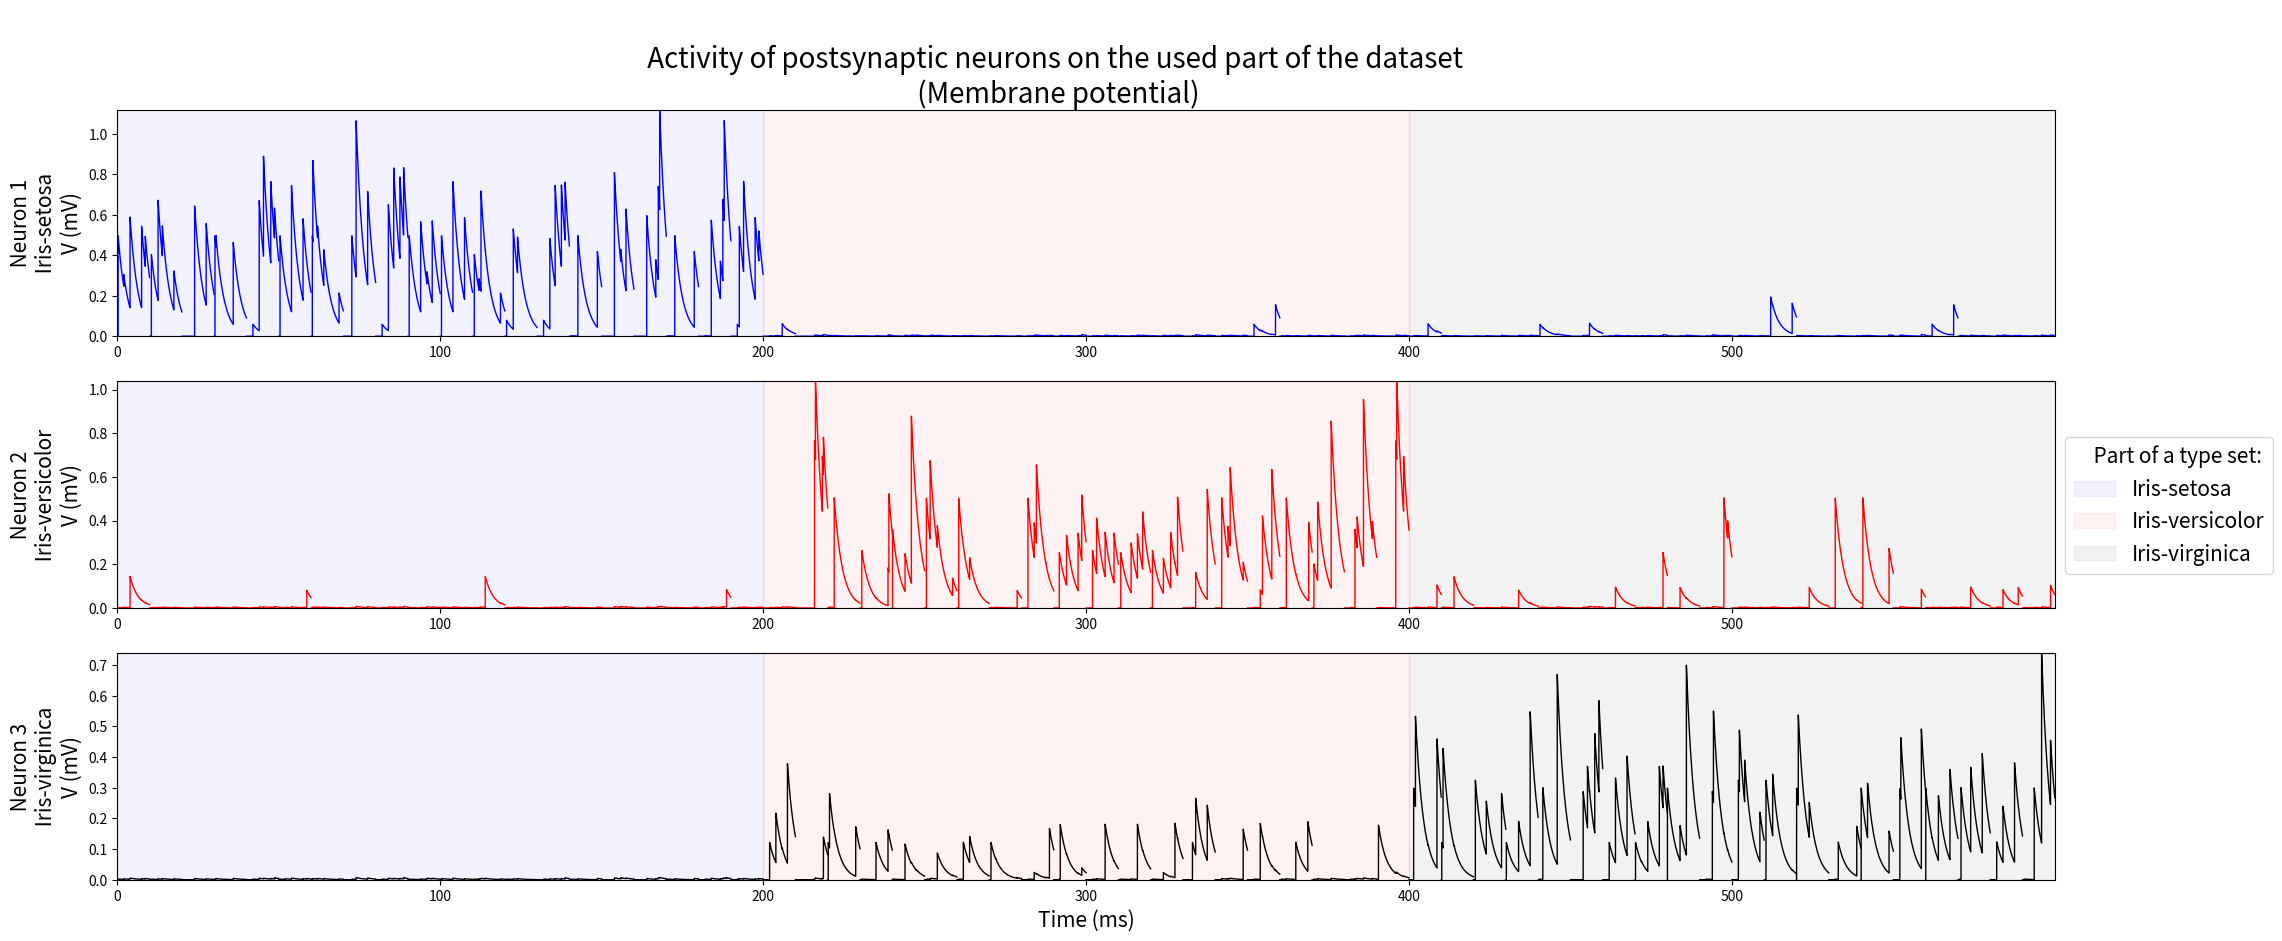

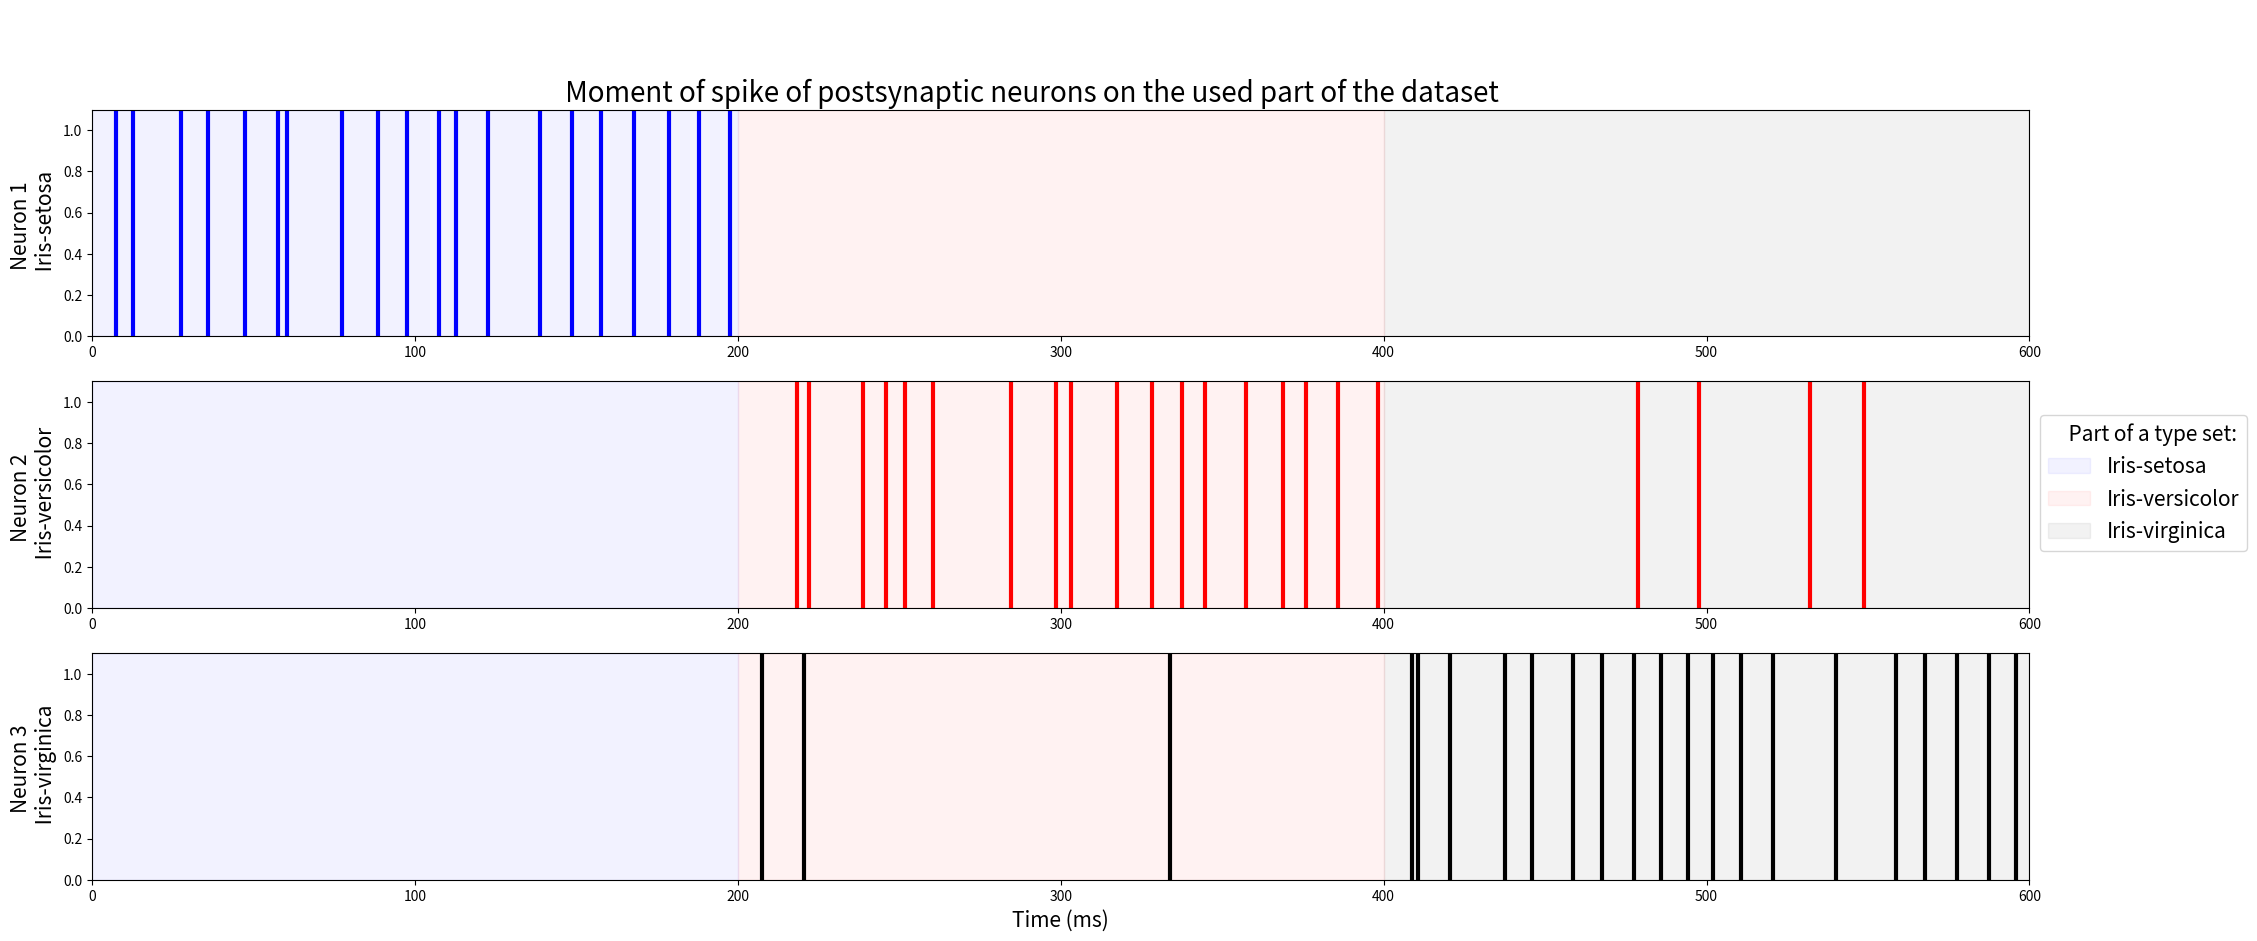

準確率: 91.67 %


In [219]:
train_stack = model_data(0, ind_type, lat_ne, 20, 40)
res = LIF_SNN(3, 60, train_stack, list_weight, 100)
v = res[0]

v_plot(v)
res = LIF_SNN(3, 60, train_stack, list_weight, 0.25)
spike_time = res[2]
spike_plot(spike_time, False, False, False)
accuracy_snn(spike_time, 20, 40, df, ind_type, 0)[2]